## Visualizing High Dimensional Data and Dimensionality Reduction using PCA

### 1. PCA for visualization without Sk-Learn

#### 1.1 Importing Libraries

In [1]:
##Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### Dataset Description : MNIST Dataset

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

The data files contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

#### 1.2 Loading the MNIST Dataset

In [2]:
dataset = pd.read_csv('./mnist_train.csv')

print(dataset.head(5))
print(dataset.columns)

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...    28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...        0      0   
1      0    0    0    0    0    0    0    0    0    0  ...        0      0   
2      4    0    0    0    0    0    0    0    0    0  ...        0      0   
3      1    0    0    0    0    0    0    0    0    0  ...        0      0   
4      9    0    0    0    0    0    0    0    0    0  ...        0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x2

In [3]:
labels = dataset['label']
features = dataset.drop('label',axis = 1)

#### 1.3 Printing the image from the greyscale code of a digit from a random data point

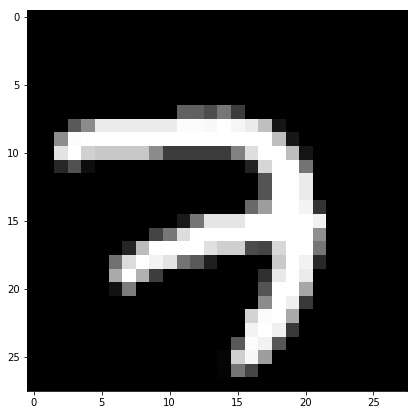

7


In [4]:
plt.figure(figsize=(7,7))
idx = 5000                                      ## Index of a random data point

grid_data = features.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(labels[idx])

In [5]:
labl = labels.head(60000)
fetures = features.head(60000)

In [6]:
print(labl.shape)
print(fetures.shape)

(60000,)
(60000, 784)


#### 1.4 Scaling and Performing PCA on the data

In [7]:
## Column standardization

std = StandardScaler().fit_transform(fetures)
print(std.shape)

(60000, 784)


#### 1.5 Calculating the co-variance matrix

In [8]:
cov_var = np.matmul(std.T,std)
print("cov matrix shape = ", cov_var.shape)
print("original shape = ", std.shape)

cov matrix shape =  (784, 784)
original shape =  (60000, 784)


#### 1.6 Calculating Top Two Eigen Values and Eigen vectors

In [9]:
from scipy.linalg import eigh 
values, vectors = eigh(cov_var, eigvals=(782,783))

print(values.shape)
print(vectors.shape)


(2,)
(784, 2)


In [10]:
vectors = vectors.T
pca = np.matmul(vectors,std.T)
print(pca.shape)

(2, 60000)


#### 1.7 We have our top two componenets that explain the most of the variance in the data

In [11]:
# appending label to the 2d projected data
new_coordinates = np.vstack((pca, labl)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.814790      -0.922159    5.0
1      -7.754403       8.708977    0.0
2       9.431338       2.328389    4.0
3      -3.746318      -6.582173    1.0
4       3.133297      -5.183251    9.0


#### 1.8 Plotting the top two Principal Component Analysis

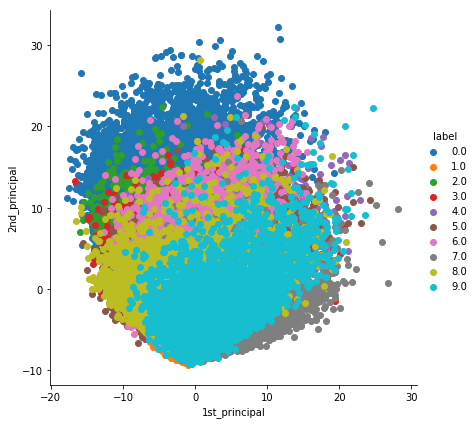

In [12]:
sns.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()

### 2. PCA for visualization Using sk learn

In [13]:
from sklearn import decomposition
pca = decomposition.PCA()

In [14]:
pca.n_components = 2
pca_data = pca.fit_transform(std)

print(pca_data.shape)
print(std.shape)

(60000, 2)
(60000, 784)


#### Stacking the label with the top two Principal Components

In [15]:
pca_data = np.vstack((pca_data.T,labl)).T
print(pca_data.shape)

(60000, 3)


In [16]:
df = pd.DataFrame(data = pca_data,columns=("1st p","2nd p","labels"))

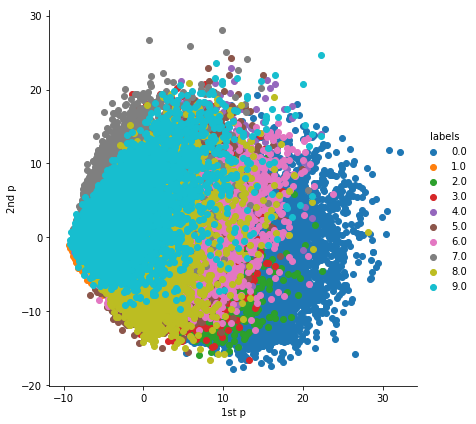

In [17]:
sns.FacetGrid(df,hue='labels',size=6).map(plt.scatter,"1st p","2nd p").add_legend()

###  3. PCA for Dimensionality reduction

#### Dimensionality Reduction:

    Dimensionality reduction is the process of reducing the dimensionality of the feature space with consideration by obtaining a set of principal features.

#### Why dimensionality reduction?

* Curse of Dimensionality
        
    In machine learning, to catch useful indicators and obtain a more accurate result, we tend to add as many features as possible at first. However, after a certain point, the performance of the model will decrease with the increasing number of elements. This phenomenon is often referred to as “The Curse of Dimensionality.”The curse of dimensionality occurs because the sample density decreases exponentially with the increase of the dimensionality. 
        

In [18]:
# We want to see the percentage of varince explained
pca = decomposition.PCA()
pca.n_compondents = 784
pca_data = pca.fit_transform(std)

In [19]:
print(pca_data.shape)
var_exp = pca.explained_variance_ / sum(pca.explained_variance_)
cum_var_exp = np.cumsum(var_exp)

(60000, 784)


#### pca.explained_variance_ tells how much variance an individual componenet explains and then we take a cumsum to check the variance explained together by the components and we plot a graph to visualize it easily.

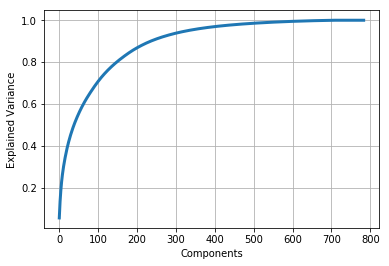

In [20]:
plt.plot(cum_var_exp,linewidth = 3)
plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.grid()
plt.show()

#### Observations:
    1. Approx 350 componenets can explain 90% of the variance.
    2. Even for approx 150 componenets we can explan 80% of variance.
    3. Reducing the dim to as low as 150 from 784 doesn't comes at an expensive price.